# Interactive learning "Active learning" 


This is a playground for an active learning setting for the course [interactive learning](https://www.mah.se/upload/FAKULTETER/TS/Forskning/Kursplan%20Interaktiv%20maskininl%C3%A4rning.pdf)

Seminar 2 on active learning with example on images of tools in two classes "screwdrivers" and "pliers"

In [6]:
# Som get started crap run this first
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import sys
import platform
sys.path.append("../../") # go to parent dir
from fastai.imports import *
print(platform.python_version())
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
# set some variables
PATH = "/storage/myData/tools/"
arch=resnet34  ##Using the resnet34 model
sz=224
print(f'NVidia GPUs is called CUDA aviable {torch.cuda.is_available()}')
print(f'deep learning accelerator aviable CuDNN {torch.backends.cudnn.enabled}')



3.6.6
NVidia GPUs is called CUDA aviable True
deep learning accelerator aviable CuDNN True


## Utility functions
Run this to unpack images that will be used for learning.

In [7]:
#Unpack images from zipfile to data lib
#% rm -rf (mydata/tools
import zipfile
with zipfile.ZipFile("/storage/myData/tools3.zip","r") as zip_ref:
    zip_ref.extractall("/storage/myData/")


## Train pliers, scissors and screwdrivers

In [3]:
# Uncomment the below if you need to reset your precomputed activations
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name="test")
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 10)
# prints training loss, validation loss and accuracy

100%|██████████| 1/1 [00:12<00:00, 12.74s/it]


epoch      trn_loss   val_loss   accuracy               
    0      1.325485   0.923833   0.461538  
    1      1.40003    0.741467   0.615385        
    2      1.257457   0.583955   0.769231        
    3      1.11453    0.462138   0.846154        
    4      0.958099   0.375245   0.846154        
    5      0.834935   0.306937   0.923077        
    6      0.736202   0.253586   0.923077        
    7      0.64653    0.21078    1.0             
    8      0.578998   0.175814   1.0             
    9      0.523269   0.148029   1.0             



[array([0.14803]), 1.0]

## View training and validation set for pliers and screwdrivers

In [9]:
# Run to register the plot functions
#And I know verbose.....
def plot_images_from_train_set(train_y):
    imgs=[]
    titles=[]
    res = np.extract(data.trn_y==train_y,data.trn_ds.fnames)
    printmd("# "+data.classes[train_y]+"s in training set")
    for i in range(0,len(res)):
        title = res[i]
        #print(title)
        imgs.append(plt.imread(PATH + res[i]))
        titles.append(title)    
    return plots(imgs,titles=titles,rows=5,figsize=(20,16))

def plot_images_from_val_set(val_y):
    imgs=[]
    titles=[]
    res = np.extract(data.val_y==val_y,data.val_ds.fnames)
    printmd("# "+data.classes[val_y]+"s in validation set")
    for i in range(0,len(res)):
        title = res[i]
        #print(title)
        imgs.append(plt.imread(PATH + res[i]))
        titles.append(title)    
    return plots(imgs,titles=titles,rows=5,figsize=(20,16))

print(data.classes)
print(data.val_y)

['plier', 'scissors', 'screwdriver']
[0 0 0 0 0 1 1 1 2 2 2 2 2]


# pliers in training set

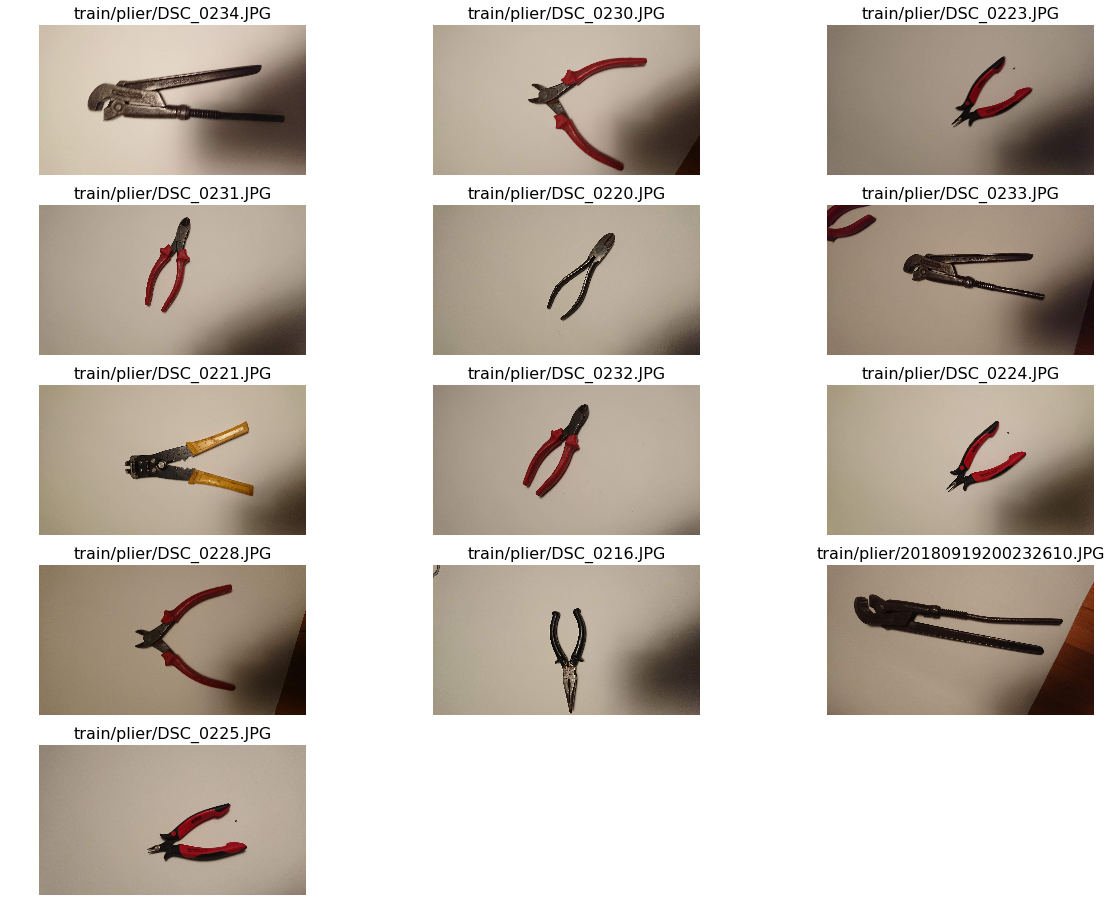

In [6]:
#Pliers
plot_images_from_train_set(0)

# scissorss in training set

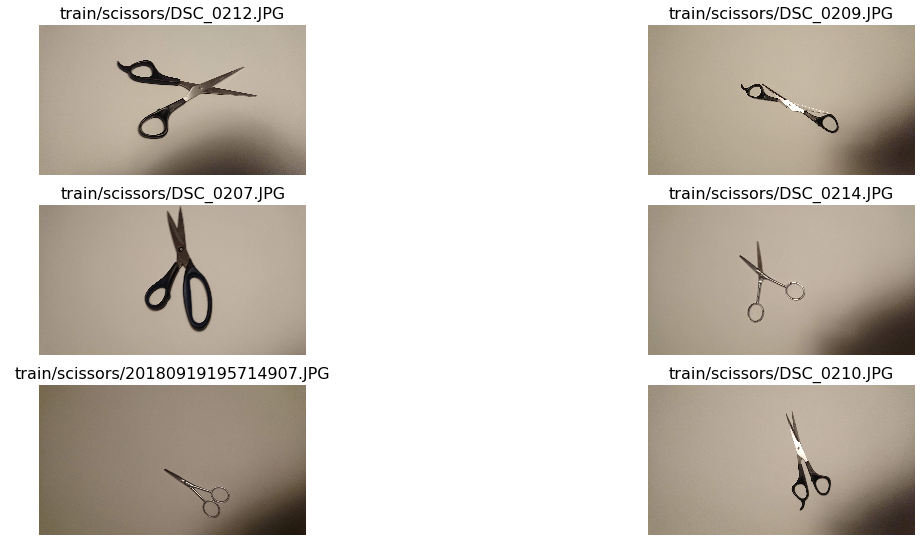

In [7]:
#Screwdrivers
plot_images_from_train_set(1)

# screwdrivers in training set

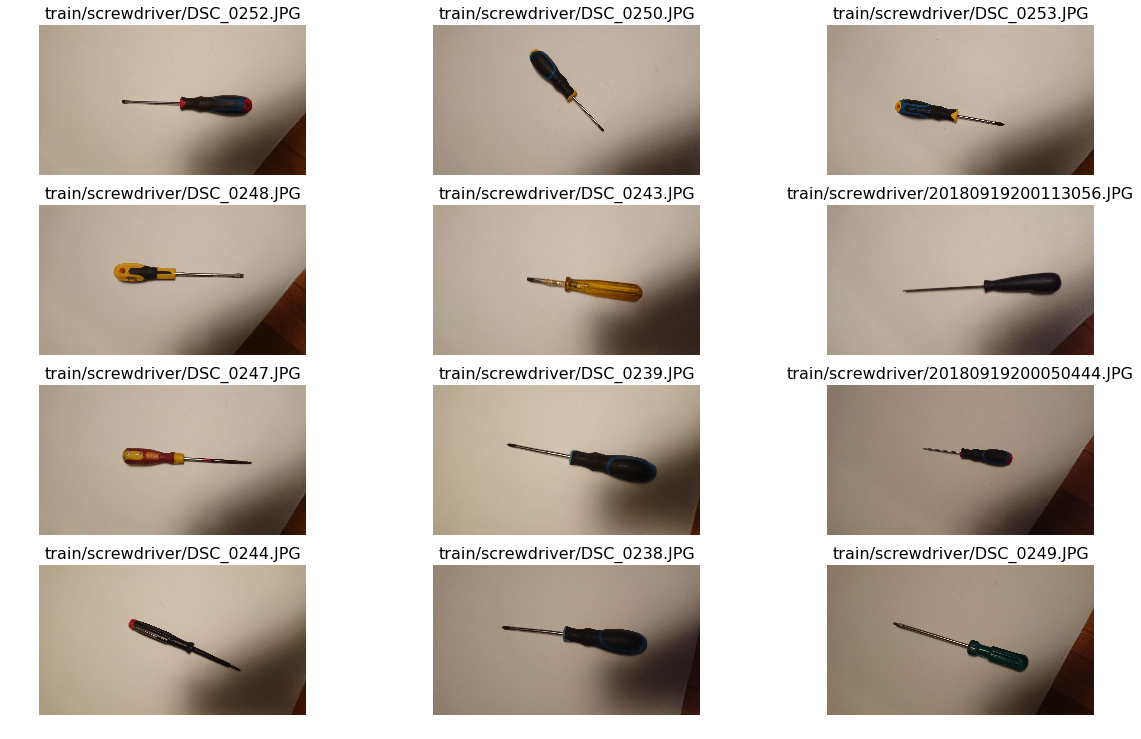

In [8]:
plot_images_from_train_set(2)

# pliers in validation set

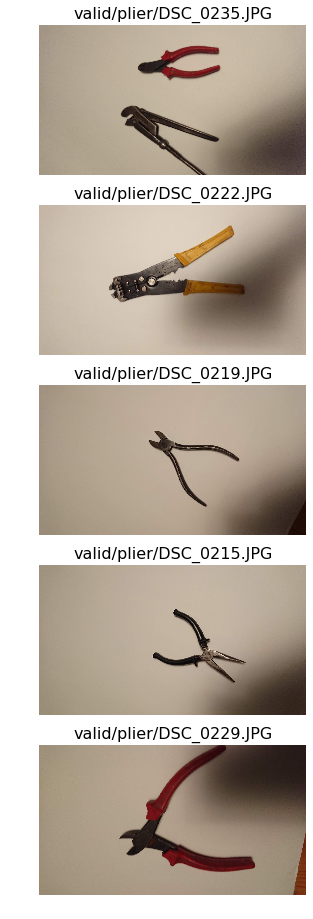

In [6]:
plot_images_from_val_set(0) #Print show 

# scissorss in validation set

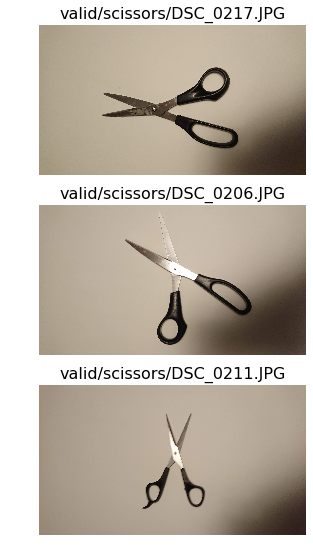

In [10]:
plot_images_from_val_set(1)

# screwdrivers in validation set

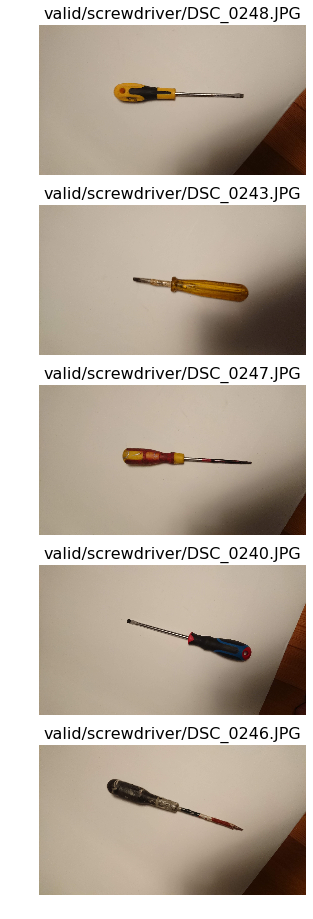

In [9]:
plot_images_from_val_set(2)

## Confusion matrix 

[[4 1 0]                             
 [0 3 0]
 [0 0 5]]


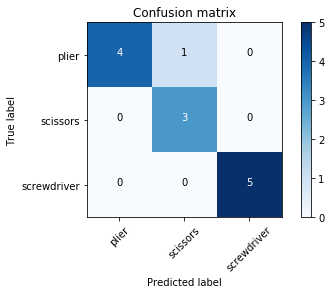

In [10]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
#accuracy_np(probs, y)
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

## Predictions on test set

Sorted in accuracy order, closer to 0 the model belives it is a plier, closer to 1 the model belives it is a screwdriver. 
So now we will know if it overfitted or included variance/bias.

In [12]:
??learn.predict

/storage/myData/tools/test/DSC_0251.JPG
/storage/myData/tools/test/DSC_0257.JPG
/storage/myData/tools/test/DSC_0255.JPG
/storage/myData/tools/test/DSC_0208.JPG
/storage/myData/tools/test/DSC_0246.JPG
/storage/myData/tools/test/20180919195757575.JPG
/storage/myData/tools/test/DSC_0226.JPG
/storage/myData/tools/test/DSC_0260.JPG
/storage/myData/tools/test/DSC_0245.JPG
/storage/myData/tools/test/DSC_0256.JPG
/storage/myData/tools/test/DSC_0237.JPG
/storage/myData/tools/test/DSC_0241.JPG
/storage/myData/tools/test/DSC_0258.JPG
/storage/myData/tools/test/DSC_0218.JPG
/storage/myData/tools/test/20180919195821099.JPG
/storage/myData/tools/test/DSC_0240.JPG
/storage/myData/tools/test/DSC_0262.JPG
/storage/myData/tools/test/DSC_0261.JPG
/storage/myData/tools/test/DSC_0259.JPG
/storage/myData/tools/test/DSC_0263.JPG
/storage/myData/tools/test/DSC_0242.JPG
/storage/myData/tools/test/DSC_0227.JPG
/storage/myData/tools/test/DSC_0236.JPG
/storage/myData/tools/test/DSC_0254.JPG
/storage/myData/tools/

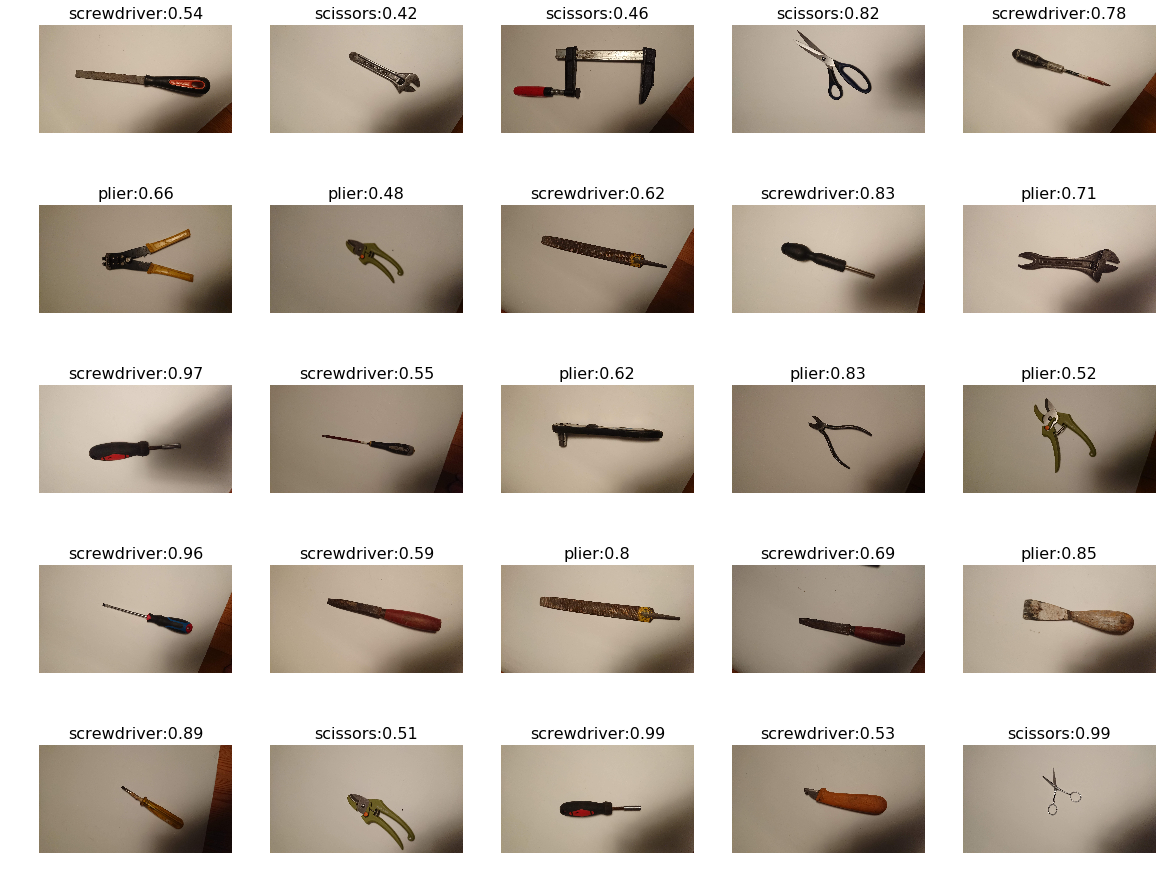

In [5]:
def plot_predictions_in_accuacy_order():
    log_preds=learn.predict(is_test=True) 
    #probs = np.round(np.exp(log_preds[:,1])*100,decimals=0) ##Convert result from log scale (probs given in log...)
    #classes = ["class_a", "class_b"]
    #classes = data.classes
    #probs=np.argmax(log_preds,axis=1)
   
    pred = np.argmax(log_preds,axis=1)
    probsall = np.exp(log_preds)
    names = data.test_ds.fnames
    img = []
    titles = []
    for i in range(0,len(data.test_ds.fnames)):
#     #for i in range(0,4):
        title = PATH + names[i]
        #print(title)
        img.append(plt.imread(title))
        #print(data.classes[pred[i]])
        #print(probsall[i,pred[i]])
        titles.append(data.classes[pred[i]]+":"+str(np.around(probsall[i,pred[i]],decimals=2)))
         #titles.append(data.classes[pred[i]]+":"+str(np.around(robsall[i,pred[i]],decimals=2)))        
    return plots(img,titles=titles,rows=5,figsize=(20,16))
#     print(pred)
#     print(probsall)
#     probs = np.exp(log_preds[:,1])
#     names = data.test_ds.fnames
#     probs_sorted = np.sort(probs)
#     print(probs)
#     print(names)
#     img_names_sorted_on_probs = [x for _,x in sorted(zip(probs,names))]
#     img = []
#     titles = []
#     for i in range(0,len(data.test_ds.fnames)):
#     #for i in range(0,4):
#         title = PATH + img_names_sorted_on_probs[i]
#         #print(title)
#         img.append(plt.imread(title))
#         titles.append(data.classes[int(probs_sorted[i]+0.5)]+":"+str(np.around(probs_sorted[i],decimals=2)))    
#     return plots(img,titles=titles,rows=5,figsize=(20,16))

plot_predictions_in_accuacy_order()